<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Course%202%20-%20Part%206%20-%20Lesson%203%20-%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [61]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model

  
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
local_weights_file = 'C:\gits_folders\Tensorflow_Lite_embeded\generic_transfer learning\inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False
  
# pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [62]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 74, 74, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 74, 74, 32)   96          conv2d_188[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 74, 74, 32)   0           batch_normalization_188[0][0]    
_______________________________________________________________________________________

In [63]:
last_output

<tf.Tensor 'mixed7_2/Identity:0' shape=(None, 7, 7, 768) dtype=float32>

In [64]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense(3, activation='softmax')(x)           

    
model = Model( pre_trained_model.input, x) 


model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [65]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 74, 74, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 74, 74, 32)   96          conv2d_188[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 74, 74, 32)   0           batch_normalization_188[0][0]    
____________________________________________________________________________________________

In [66]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "C:\\dataset_experimentale\\train"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = training_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size = 10,
                                                    class_mode='categorical', 
                                                    target_size = (150, 150)) 


VALIDATION_DIR = "C:\\dataset_experimentale\\validation"
validation_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150,150),
    class_mode='categorical',
  batch_size=10
)

Found 222 images belonging to 3 classes.
Found 222 images belonging to 3 classes.


In [70]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 10,
            epochs = 10,
            validation_steps = 5,
            verbose = 2)

Train for 10 steps, validate for 5 steps
Epoch 1/10
10/10 - 4s - loss: 0.6606 - accuracy: 0.8500 - val_loss: 2.6501 - val_accuracy: 0.8000
Epoch 2/10
10/10 - 4s - loss: 0.3768 - accuracy: 0.8800 - val_loss: 1.4775 - val_accuracy: 0.8000
Epoch 3/10
10/10 - 4s - loss: 0.4793 - accuracy: 0.9130 - val_loss: 2.6552 - val_accuracy: 0.7400
Epoch 4/10
10/10 - 4s - loss: 0.3578 - accuracy: 0.8804 - val_loss: 0.5627 - val_accuracy: 0.9000
Epoch 5/10
10/10 - 4s - loss: 0.4297 - accuracy: 0.8696 - val_loss: 1.3816 - val_accuracy: 0.7400
Epoch 6/10
10/10 - 4s - loss: 0.3559 - accuracy: 0.8900 - val_loss: 1.1395 - val_accuracy: 0.8400
Epoch 7/10
10/10 - 4s - loss: 0.2911 - accuracy: 0.8800 - val_loss: 1.3591 - val_accuracy: 0.7600
Epoch 8/10
10/10 - 4s - loss: 0.2991 - accuracy: 0.8900 - val_loss: 4.6279 - val_accuracy: 0.7400
Epoch 9/10
10/10 - 4s - loss: 0.8225 - accuracy: 0.8478 - val_loss: 2.5529 - val_accuracy: 0.7600
Epoch 10/10
10/10 - 4s - loss: 0.1174 - accuracy: 0.9457 - val_loss: 1.1930 -

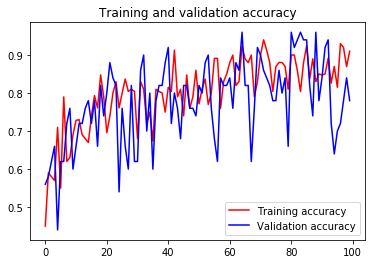

<Figure size 432x288 with 0 Axes>

In [69]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [54]:
import PIL

In [55]:
image_batch, label_batch = next(iter(train_generator))

In [56]:
import numpy as np
import numpy
import os
import PIL
import PIL.Image
import matplotlib.pyplot as plt

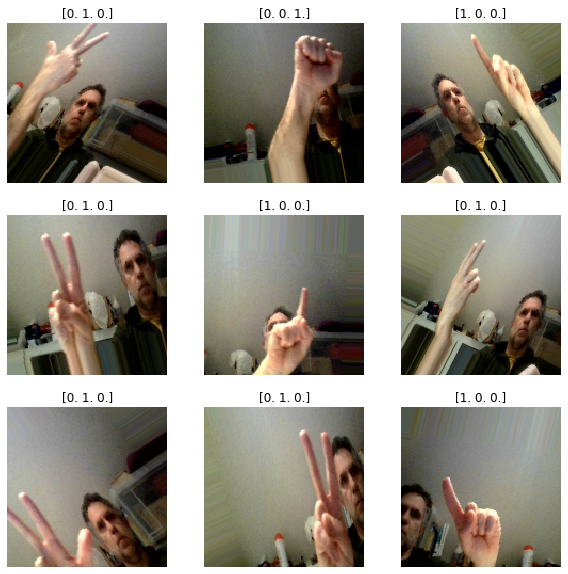

In [72]:
image_batch, label_batch = next(iter(train_generator))
plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i])#.numpy().astype("uint8"))
  label = label_batch[i]
  plt.title(label)
  plt.axis("off")

In [73]:
model.save("c:\\giulio\\model01")


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: c:\giulio\model01\assets


In [60]:
! dir 

 Volume in drive C is Windows-SSD
 Volume Serial Number is 36BC-8C76

 Directory of c:\gits_folders\Tensorflow_Lite_embeded\generic_transfer learning

21/12/2020  00:34    <DIR>          .
21/12/2020  00:34    <DIR>          ..
20/12/2020  23:25    <DIR>          .ipynb_checkpoints
07/12/2020  22:18        68,606,236 cats_and_dogs_filtered.zip
20/12/2020  19:26        20,074,212 converted_model.tflite
20/12/2020  19:18         2,438,856 images.ipynb
07/12/2020  21:55        87,910,968 inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
20/12/2020  19:26             3,902 Model Reader and Converter.ipynb
21/12/2020  00:34       344,860,928 one_two.h5
21/12/2020  00:34           986,108 One_two_treee Model.ipynb
13/08/2020  16:09             2,105 simplified_model_for rasberry.py
08/12/2020  23:53         1,030,909 Transfer_test.ipynb
               9 File(s)    525,914,224 bytes
               3 Dir(s)  206,520,233,984 bytes free


In [88]:

from tensorflow import keras
import tensorflow as tf



In [112]:
cat="dog.2002.jpg"
#cat='cat.2048.jpg'
#sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = keras.preprocessing.image.load_img(
    cat, target_size=(150, 150)
)
img_array = keras.preprocessing.image.img_to_array(img)

img_array = np.array(img_array).astype('float32')/255 #extra line

img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
#score = tf.nn.softmax(predictions[0])

print( "This image most likely belongs to {}".format(predictions[0,0] ))

This image most likely belongs to 1.0


In [110]:
predictions[0,0]

0.0

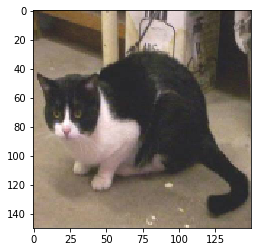

In [84]:
plt.imshow(img)

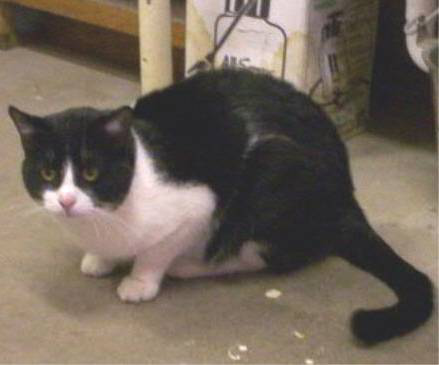

In [86]:
PIL.Image.open(cat)